In [1]:
import numpy as np
class KNearestNeighbours:
    def __init__(self, k=1):
        self.k = k
        self.X_training_data = None
        self.y_training_labels = None

    def fit(self, X, y):
        if self.k > len(X):
            raise ValueError("k must be less than or equal to the number of training data points.")
        self.X_training_data = X
        self.y_training_labels = y

    def predict(self, X):
        predictions = [self._predict_point(point) for point in X]
        return predictions

    def _predict_point(self, point):
        k_nearest = [(-1, float('inf')) for _ in range(self.k)]  # [(index, distance), ...]

        for i, training_point in enumerate(self.X_training_data):
            if (point == training_point).all():  # Skip the identical point
                continue

            distance = self._euclidean_distance(point, training_point)
            
            # Check if the distance is smaller than the current k-nearest distances
            for j, (idx, dist) in enumerate(k_nearest):
                if distance < dist:
                    k_nearest.insert(j, (i, distance))
                    k_nearest = k_nearest[:self.k]  # Keep only the k-nearest distances
                    break

        # Get labels of the k-nearest points
        k_labels = [self.y_training_labels[idx] for idx, dist in k_nearest]
        
        # Majority vote
        majority_label = max(set(k_labels), key=k_labels.count)
        return majority_label

    def _euclidean_distance(self, p1, p2):
        return np.sqrt(np.sum((np.array(p1) - np.array(p2))**2))

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
threeNN = KNearestNeighbours(k=3)

In [3]:
#%load_ext autoreload
import sys
sys.path.append("..")
from train_test_split import train_test_split
iris_X = iris['data']
iris_y = iris['target']
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, seed=310898)
print(iris_X_train.shape)
print(iris_X_test.shape)
print(iris_y_train.shape)
print(iris_y_test.shape)

(113, 4)
(37, 4)
(113,)
(37,)


In [4]:
threeNN.fit(iris_X_train, iris_y_train)
pred_threeNN = threeNN.predict(iris_X_test)
print(pred_threeNN == iris_y_test)
accuracy = np.mean(pred_threeNN == iris_y_test)
error = 1 - accuracy
print("Accuracy: ", accuracy)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
  True]
Accuracy:  0.9459459459459459


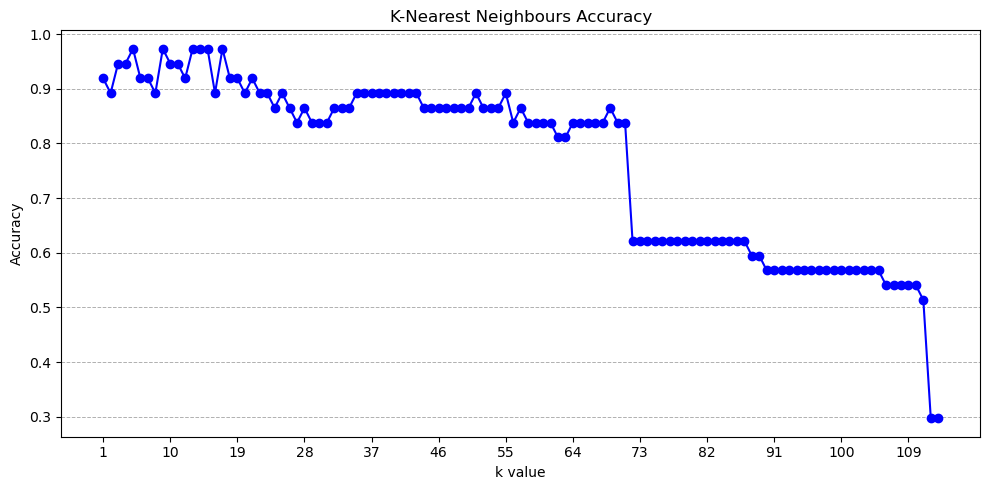

In [5]:
import matplotlib.pyplot as plt
iris_accuracy = []
for n in range(1, len(iris_X_train) + 1):
    iris_knn = KNearestNeighbours(k=n)
    # Pass the correct training labels
    iris_knn.fit(iris_X_train, iris_y_train)
    pred_iris_knn = iris_knn.predict(iris_X_test)
    knn_accuracy = np.mean(pred_iris_knn == iris_y_test)
    iris_accuracy.append(knn_accuracy)
#print(iris_accuracy)
k_values = list(range(1, len(iris_accuracy) + 1))

plt.figure(figsize=(10, 5))
plt.plot(k_values, iris_accuracy, marker='o', linestyle='-', color='b',markersize=6)
plt.title('K-Nearest Neighbours Accuracy')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.xticks(k_values[::9])  # Ensure that only integer k values are used as x-ticks
plt.grid(True,which='both', axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
heart_X = heart_disease.data.features 
heart_y = heart_disease.data.targets 

print(heart_X)
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   3.0  
2        2  2.0